In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/home/mglee/VSCODE/git_folder/coupang/data/coupang_naver_monthlyTop4000_body.csv", encoding='utf-8', index_col=0)

In [3]:
df.columns = ['url', 'title', 'body']

In [4]:
df

,url,title,body
0,https://n.news.naver.com/mnews/article/119/000...,알림 꺼도 계속 뜨는 ‘팝업창’…교묘한 압박 상술 다크패턴 맹추격④,[\n상품 주문만 하고 싶은데 슬쩍 뜨는 팝업국내 전자상거래 앱 97% 다크패턴 발...
1,https://n.news.naver.com/mnews/article/119/000...,"가족사진, 무료 촬영이라더니…‘인화’ 추가비용에 당했다 다크패턴 맹추격③","[\n소비자 빈틈 노린 ‘꼼수 마케팅’ 기승소비자원, 사진촬영 상담 해마다 2천건1..."
2,https://n.news.naver.com/mnews/article/032/000...,"“이런 유형이 눈속임 상술입니다” 공정위, ‘다크패턴’ 잡는다",[\n\n\n\n\n관련 이미지. 경향DB#A씨는 가입만 하면 30일 무료 체험할 ...
3,https://n.news.naver.com/mnews/article/020/000...,“나도 모르게 자동결제-유료전환”… 소비자 눈속임 ‘다크 패턴’ 규제,"[\n공정위, 19개 유형 분류… 법개정 추진최근 인도네시아 발리로 여행을 다녀온 ..."
4,https://n.news.naver.com/mnews/article/366/000...,당정 “다크패턴 근절 법적 근거 위해 전자상거래법 개정”,[\n상반기엔 다크패턴 방지 가이드라인 배포하반기엔 다크패턴 사업별 실태 비교·분석...
...,...,...,...
478,https://n.news.naver.com/mnews/article/028/000...,업계 최초라서가 아니다…구글·아이폰의 성공 비결은 ‘이것’,[\n\t\t\t [한겨레] [27돌 창간 기획] 사람 중심 스마트시대로\n\n\n...
479,https://n.news.naver.com/mnews/article/028/000...,배달의 한겨레 ‘폭염’에 가장 취약한 도시는?,[\n\t\t\t [한겨레] 8월 4일 뉴스 브리핑\n\n\n\n&lt;디지털 한겨...
480,https://n.news.naver.com/mnews/article/277/000...,올 가을 트렌드 '록시크(Rock Chic)'를 아시나요?,[\n\n\n\n\n\n\n[아시아경제 박소연 기자]지난 10일 독특한 디자인의 영...
481,https://n.news.naver.com/mnews/article/111/000...,"패셔니★, 올가을에는 '블랙컬러 + 록스타' 유행",[\n\n\n\n\n\n\n&lt;조이뉴스24&gt;패션쇼에서 만난 패셔니스타들의 ...


In [5]:
text = df['body']

In [6]:
text

0      [\n상품 주문만 하고 싶은데 슬쩍 뜨는 팝업국내 전자상거래 앱 97% 다크패턴 발...
1      [\n소비자 빈틈 노린 ‘꼼수 마케팅’ 기승소비자원, 사진촬영 상담 해마다 2천건1...
2      [\n\n\n\n\n관련 이미지. 경향DB#A씨는 가입만 하면 30일 무료 체험할 ...
3      [\n공정위, 19개 유형 분류… 법개정 추진최근 인도네시아 발리로 여행을 다녀온 ...
4      [\n상반기엔 다크패턴 방지 가이드라인 배포하반기엔 다크패턴 사업별 실태 비교·분석...
                             ...                        
478    [\n\t\t\t [한겨레] [27돌 창간 기획] 사람 중심 스마트시대로\n\n\n...
479    [\n\t\t\t [한겨레] 8월 4일 뉴스 브리핑\n\n\n\n&lt;디지털 한겨...
480    [\n\n\n\n\n\n\n[아시아경제 박소연 기자]지난 10일 독특한 디자인의 영...
481    [\n\n\n\n\n\n\n&lt;조이뉴스24&gt;패션쇼에서 만난 패셔니스타들의 ...
482    [\n\n\n\n\n\n사진출처: 릴리젼\n[패션팀] 영국 브랜드 릴리젼의 론칭 행...
Name: body, Length: 483, dtype: object

Tokenizing

토크나이징에는 konlpy의 Okt를 사용합니다. \
패키지가 없으면 다운로드 받으시고, 다른 pos tagger를 사용하고 싶으시면 수정하세요

In [7]:
from konlpy.tag import Okt
from tqdm import tqdm

okt = Okt()

In [8]:
def tokenizing(x):
    lst = []
    for item in tqdm(x):
        if len(str(item)) > 9999000:
            lst.append(["Too Long"])
        else:
            lst.append(okt.nouns(str(item)))
    return lst

In [9]:
#민원에 양에 따라 시간이 조금 걸릴 수도 있습니다.
#민원의 길이가 1000글자 이상일 경우 토크나이징을 수행하지 않고 Too Long이라는 토큰으로 대치합니다.
tokens = tokenizing(text)

100%|██████████| 483/483 [00:26<00:00, 18.40it/s]


In [18]:
for t in tokens:
    txt = " "
    for w in t:
        txt = txt + w + " "
    print(txt)
    break

 상품 주문 팝업 국내 전자상거래 앱 다크패턴 발견 입법 마련 속도 관련 법안 개 발의 다크패턴 눈 상술 중 소비자 심리 압박 가해 특정 행위 거나 유도 상술 압박 상술 그래픽 맹찬호 기자 데일리안 맹찬호 기자 전날 주문 아침 눈 집 앞 물건 볼 수 서비스 이용 가정 주부 씨 이커머스 전자상거래 플랫폼 발달 대중화 직접 장 가지 스마트폰 하나로 해결 최근 씨 주로 이용 이커머스 애플리케이션 앱 상품 구매 유도 팝업창 불편 수신 차단 며칠 뒤 알림 수신 동의 요구 팝업 계속 고객 센터 불만 표 답변 양해 전부 씨 소비 알고리즘 상품 추천 처음 반복 팝업 물건 사라 압박 느낌 온라인 거래 다크패턴 눈 상술 소비자 피해 늘 소비자 심리 압박 가해 행위 거나 유도 압박 상술 이 유행 한국 소비자원 실태 조사 개 모바일 앱 총 개 다크패턴 적용 것 분석 평균 개 다크패턴 앱 포함 것 조사 대상 개 앱 가운데 다크패턴 개 이상 이 현행 전자상거래 등 소비자보호 관 법률 적용 규율 행위 제도 개선 지적 제기 공정위 압박 상술 세부 유형 중 반복 간섭 대해 법적 근거 법 개정 추진 해당 행위 소비자 의사 치 선택 강요 것 위법 인식 소비자 비율 이 유럽연합 디지털 서비스 법 를 통해 금지 등 국제 소비자 피해 유발 행위 인식 규율 필요성 대두 이 공정위 시간 내 반복 의사 변경 요구 행위 규율 대상 한정 다만 시간 간격 일주일 동안 보기 를 클릭 해당 기간 팝업 경우 등 대상 제외 필요 국회 다크패턴 규제 관련 법안 지속 논의 현재 다크패턴 관련 법안 개 발의 상태 송 석준 국민 힘 의원 지난달 정거 위원회 협의 온라인 다크패턴 금지 내용 전자상거래 등 소비자보호 관 법률 일부 개정 법률 안 대표 발의 법안 무료 유료 전환 결제 대금 경우 통지 구매 비용 의무 표시 상반기 중 법 개정 동시 온라인 다크패턴 피해 방지 위 가이드라인 제정 입법 전 소비자 사업자 기준 제시 피해 취지 공정위 소비자 피해 유발 우려 다크패턴 유형 유의점 등 구체 사례 통해 피해 방지 노력 고 소비

In [11]:
txt_lst = []
for t in tokens:
    txt = ""
    for w in t:
        txt = txt + w + " "
    txt_lst.append(txt)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df = 5)

count_vec = cv.fit_transform(txt_lst)

In [29]:
dtm = pd.DataFrame(count_vec.toarray(), columns=cv.get_feature_names())

/home/mglee/anaconda3/envs/save/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
co_mat = dtm.T @ dtm

In [31]:
co_mat

,가가,가게,가격,가까스로,가까이,가능,가능성,가동,가량,가령,...,후보,후보자,후생,후속,훈련,훼손,휴대전화,휴대폰,흐름,희소성
가가,5,1,10,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
가게,1,5,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
가격,10,1,2912,16,60,8,82,49,40,6,...,0,64,2,4,6,7,0,6,11,103
가까스로,0,0,16,5,3,0,5,0,3,0,...,0,0,0,0,0,0,0,0,0,2
가까이,0,0,60,3,9,0,6,3,3,0,...,0,0,0,0,0,2,0,1,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
훼손,0,0,7,0,2,0,24,0,0,0,...,0,2,2,2,0,34,0,2,7,0
휴대전화,0,0,0,0,0,0,0,0,0,6,...,0,0,6,3,0,0,41,6,0,0
휴대폰,0,0,6,0,1,0,5,1,0,0,...,0,0,0,0,0,2,6,14,3,0
흐름,0,0,11,0,3,2,16,0,7,1,...,4,0,10,1,1,7,0,3,54,0


In [33]:
co_oc_dict = {}


for word in co_mat.index:
    co_oc_dict[word] = {}

for w1, row in co_mat.iterrows():
    for w2, v in zip(row.index, row):
        co_oc_dict[w1][w2] = co_oc_dict[w1].get(w2, 0) + v

In [36]:
sorted(co_oc_dict['다크패턴'].items(), reverse=True, key=lambda item: item[1])[:10]

[('다크패턴', 11771),
 ('소비자', 10753),
 ('온라인', 4481),
 ('행위', 4394),
 ('규제', 3597),
 ('유형', 3549),
 ('공정위', 3529),
 ('피해', 3264),
 ('플랫폼', 3027),
 ('사업자', 3023)]

Visualization

In [109]:
import networkx as nx

키워드 네트워크를 통해 시각화

In [124]:
g = nx.Graph()

In [125]:
center_keyword = '다크패턴' #이 민원이 무엇을 키워드로 뽑은 민원인지 적어주면 됩니다.


depth1 = sorted(co_oc_dict[center_keyword].items(), reverse=True, key=lambda item: item[1])[1:50]

In [126]:
for node, weight in depth1:
    g.add_edge(center_keyword, node, weight = weight)

In [127]:
nodes = list(g.nodes())
nodes.remove(center_keyword)

In [128]:
depth2 = {}
depth2_2 = {}

for node in nodes:
    temp = sorted(co_oc_dict[node].items(), reverse=True, key=lambda item: item[1])[1:30]
    depth2[node] = temp

In [129]:
for key in depth2.keys():
    for node, weight in depth2[key]:
        g.add_edge(key, node, weight=weight)

In [130]:
# nodes_d2 = list(g.nodes())
# for n in nodes:
#     nodes_d2.remove(n)

In [131]:
# depth3 = {}
# depth3_2 = {}

# for node in nodes_d2:
#     temp = sorted(co_oc_dict[node].items(), reverse=True, key=lambda item: item[1])[1:10]
#     depth3[node] = temp

In [69]:
# for key in depth3.keys():
#     for node, weight in depth3[key]:
#         g.add_edge(key, node, weight=weight)

In [132]:
len(g.nodes())

112

In [133]:
len(nodes)

49

맥북이나 리눅스의 경우 기본적으로 plt에서 지원하는 한글폰트가 없습니다. 

'맥북 plt 한글' 등으로 검색해서 다운로드 받아서 아래의 코드를 실행하거나 

윈도우를 쓰는 친한 친구에게 그냥 코드 돌려달라고 부탁해보세요

In [134]:
import matplotlib.font_manager as fm
import matplotlib

#Change font path fit to your enviroment
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=18)
font_name = fm.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf").get_name()

matplotlib.rcParams['font.family'] ='NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [135]:
nodes.append(center_keyword)

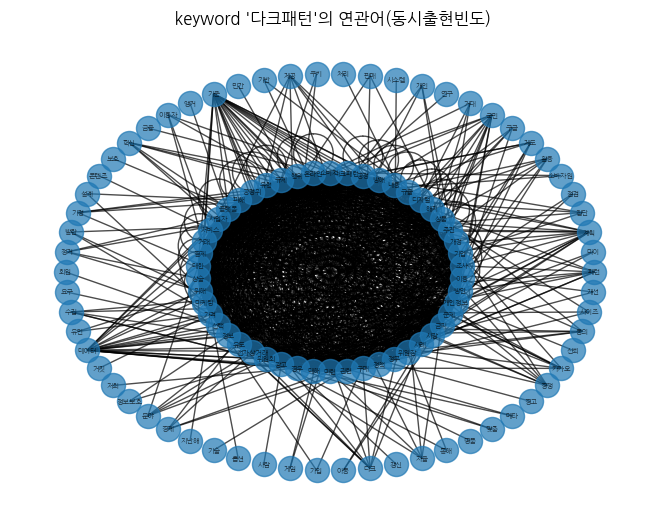

In [136]:
import numpy as np

pos = nx.shell_layout(g, [nodes, set(g.nodes()) - set(nodes) - set('다크패턴')])
#pos = nx.kamada_kawai_layout(g)

#labels = nx.get_edge_attributes(g, 'weight')
cent=nx.edge_betweenness_centrality(g)
nx.draw(g, pos = pos, with_labels = True, font_family = font_name, font_size = 5, alpha = 0.7)
#nx.draw_networkx_edge_labels(g, edge_labels=labels, font_size = 3, pos = pos)
[nx.draw_networkx_edges(g ,pos=pos,edgelist=[key],alpha=np.amin([value*0.01,1]),width=1) for key,value in cent.items()]
matplotlib.pyplot.title(" keyword '다크패턴'의 연관어(동시출현빈도)")

matplotlib.pyplot.savefig(f"./다크패턴.png", format="PNG", dpi = 1000)


# pos = nx.kamada_kawai_layout(g2)
# #labels = nx.get_edge_attributes(g2, 'weight')
# cent=nx.edge_betweenness_centrality(g2)
# nx.draw(g2, pos = pos, with_labels = True, font_family = font_name, font_size = 5, alpha = 0.7)
# [nx.draw_networkx_edges(g2 ,pos=pos,edgelist=[key],alpha=np.amin([value*10,1]),width=5) for key,value in cent.items()] 

# matplotlib.pyplot.savefig(f"./다크패턴2.png", format="PNG", dpi = 1000)

In [140]:
cs = set(sorted(co_oc_dict['쿠팡'].items(), reverse=True, key=lambda item: item[1])[1:50])
fs = set(sorted(co_oc_dict['페이스북'].items(), reverse=True, key=lambda item: item[1])[1:50])
gs = set(sorted(co_oc_dict['구글'].items(), reverse=True, key=lambda item: item[1])[1:50])
ns = set(sorted(co_oc_dict['네이버'].items(), reverse=True, key=lambda item: item[1])[1:50])
ks = set(sorted(co_oc_dict['카카오'].items(), reverse=True, key=lambda item: item[1])[1:50])

In [164]:
compare = pd.merge(
pd.merge(
    pd.merge(
    pd.merge(
        pd.DataFrame(cs, columns=['keyword', 'c_v']) , pd.DataFrame(fs, columns=['keyword', 'f_v']), how='outer'), 
    pd.DataFrame(gs, columns=['keyword', 'g_v']), how = 'outer'), 
    pd.DataFrame(ns, columns=['keyword', 'n_v']), how = 'outer'),
pd.DataFrame(ks, columns=['keyword', 'k_v']), how='outer')

In [168]:
compare = compare.fillna(100)

In [172]:
compare = compare.set_index('keyword') 

In [178]:
compare = compare.apply(lambda x : x / compare['c_v'])


In [185]:
#페이스북에 비해 쿠팡과 함께 자주 언급되는 키워드
compare.sort_values('f_v').head(10)

,c_v,f_v,g_v,n_v,k_v
keyword,,,,,
멤버십,1.0,0.167224,0.167224,0.167224,0.167224
회원,1.0,0.271003,0.271003,0.271003,0.271003
공정위,1.0,0.297619,2.330357,0.732143,2.366071
결제,1.0,0.298507,0.298507,0.298507,0.298507
해지,1.0,0.299401,0.299401,0.299401,0.299401
총수,1.0,0.317460,0.317460,0.317460,0.317460
지정,1.0,0.335570,0.335570,0.335570,0.335570
연장,1.0,0.341297,0.341297,0.341297,0.341297
쿠키,1.0,0.344828,2.537931,1.400000,0.344828


In [186]:
#구글에 비해 쿠팡과 함께 자주 언급되는 키워드
compare.sort_values('g_v').head(10)

,c_v,f_v,g_v,n_v,k_v
keyword,,,,,
멤버십,1.0,0.167224,0.167224,0.167224,0.167224
회원,1.0,0.271003,0.271003,0.271003,0.271003
결제,1.0,0.298507,0.298507,0.298507,0.298507
해지,1.0,0.299401,0.299401,0.299401,0.299401
총수,1.0,0.317460,0.317460,0.317460,0.317460
지정,1.0,0.335570,0.335570,0.335570,0.335570
연장,1.0,0.341297,0.341297,0.341297,0.341297
문제,1.0,0.905455,0.363636,0.363636,4.560000
구매,1.0,0.364964,0.364964,0.364964,0.364964


In [181]:
#네이버에 비해 쿠팡과 함께 자주 언급되는 키워드
compare.sort_values('n_v').head(10)

,c_v,f_v,g_v,n_v,k_v
keyword,,,,,
멤버십,1.0,0.167224,0.167224,0.167224,0.167224
플랫폼,1.0,0.988987,2.801762,0.220264,8.724670
다크패턴,1.0,0.358824,1.098824,0.256471,0.117647
회원,1.0,0.271003,0.271003,0.271003,0.271003
동의,1.0,0.875686,2.656307,0.281536,0.182815
결제,1.0,0.298507,0.298507,0.298507,0.298507
해지,1.0,0.299401,0.299401,0.299401,0.299401
총수,1.0,0.317460,0.317460,0.317460,0.317460
지정,1.0,0.335570,0.335570,0.335570,0.335570


In [182]:
#카카오에 비해 쿠팡과 함께 자주 언급되는 키워드
compare.sort_values('k_v').head(10)

,c_v,f_v,g_v,n_v,k_v
keyword,,,,,
다크패턴,1.0,0.358824,1.098824,0.256471,0.117647
멤버십,1.0,0.167224,0.167224,0.167224,0.167224
동의,1.0,0.875686,2.656307,0.281536,0.182815
회원,1.0,0.271003,0.271003,0.271003,0.271003
결제,1.0,0.298507,0.298507,0.298507,0.298507
해지,1.0,0.299401,0.299401,0.299401,0.299401
총수,1.0,0.317460,0.317460,0.317460,0.317460
지정,1.0,0.335570,0.335570,0.335570,0.335570
연장,1.0,0.341297,0.341297,0.341297,0.341297
